<hr>

### **`Understanding and Cleaning the Data`**

<p style='text-align: right;'> 15 points </p>


In [2]:
# Importing the required libraries, pandas, pyplot, numpy, seaborn, preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline

In [3]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [193]:
# Reading the csv file and putting it into 'df' object.
df = pd.read_csv("adult_dataset-1.csv")
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [194]:
# Let's understand the type of values in each column of our dataframe 'df'.
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [195]:
# Let's understand the data, how it look like.(Only first 5 rows)
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [196]:
# rows with missing values represented as'?'.
df1=df[(df["workclass"]== "?") &(df["occupation"]=="?")]


#print missing rows
df1


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
14,51,?,172175,Doctorate,16,Never-married,?,Not-in-family,White,Male,0,2824,40,United-States,>50K
24,61,?,135285,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,2603,32,United-States,<=50K
44,71,?,100820,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,2489,15,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32533,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32534,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32541,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32543,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [197]:
# Print df_1 varaible information

df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1836 entries, 0 to 32544
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             1836 non-null   int64 
 1   workclass       1836 non-null   object
 2   fnlwgt          1836 non-null   int64 
 3   education       1836 non-null   object
 4   education.num   1836 non-null   int64 
 5   marital.status  1836 non-null   object
 6   occupation      1836 non-null   object
 7   relationship    1836 non-null   object
 8   race            1836 non-null   object
 9   sex             1836 non-null   object
 10  capital.gain    1836 non-null   int64 
 11  capital.loss    1836 non-null   int64 
 12  hours.per.week  1836 non-null   int64 
 13  native.country  1836 non-null   object
 14  income          1836 non-null   object
dtypes: int64(6), object(9)
memory usage: 229.5+ KB


There are 1836 rows with missing values, which is about 5% of the total data. We choose to simply drop these rows, since dropping just 5% data won't make any harm.

In [198]:
# dropping the rows having missing values in workclass
df=df.drop(df1.index,axis=0)

In [199]:
#Print first 5 rows of dataframe after dropping
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [200]:
X=df[df.values=="?"]

In [201]:
X.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K
18,22,Private,119592,Assoc-acdm,12,Never-married,Handlers-cleaners,Not-in-family,Black,Male,0,2824,40,?,>50K
65,60,Self-emp-inc,226355,Assoc-voc,11,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,2415,70,?,>50K
86,39,Self-emp-not-inc,218490,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,2415,50,?,>50K
87,43,Federal-gov,156996,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,2415,55,?,>50K


Thus, the columns occupation and native.country contain some "?"s. Let's get rid of them.

In [202]:
# dropping the "?"s
df=df.drop(X.index,axis=0)

Now we have a clean dataframe which is ready for model building.<br>

In [203]:
# clean dataframe details
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 1 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education.num   30162 non-null  int64 
 5   marital.status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital.gain    30162 non-null  int64 
 11  capital.loss    30162 non-null  int64 
 12  hours.per.week  30162 non-null  int64 
 13  native.country  30162 non-null  object
 14  income          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [204]:
# select all categorical variables
df_categorical = df[["workclass","education","marital.status","occupation","relationship","race","sex","native.country","income"]]


#print first 5 rows of categorical columns
df_categorical.head()


,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States,<=50K
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States,<=50K
4,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,United-States,<=50K
5,Private,HS-grad,Divorced,Other-service,Unmarried,White,Female,United-States,<=50K
6,Private,10th,Separated,Adm-clerical,Unmarried,White,Male,United-States,<=50K


In [205]:
# Initialise LabelEncoder function
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()

#Apply encoding on df_categorical
df_categorical = df_categorical.apply(le.fit_transform)



#print df_categorical first 5 rows

df_categorical.head() 

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
1,2,11,6,3,1,4,0,38,0
3,2,5,0,6,4,4,0,38,0
4,2,15,5,9,3,4,0,38,0
5,2,11,0,7,4,4,0,38,0
6,2,0,5,0,4,4,1,38,0


In [206]:
# drop all categorical columns from df 
df1 = df.drop(["workclass","education","marital.status","occupation","relationship","sex","race","native.country","income"],axis=1)

In [207]:
df1

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
1,82,132870,9,0,4356,18
3,54,140359,4,0,3900,40
4,41,264663,10,0,3900,40
5,34,216864,9,0,3770,45
6,38,150601,6,0,3770,40
...,...,...,...,...,...,...
32556,22,310152,10,0,0,40
32557,27,257302,12,0,0,38
32558,40,154374,9,0,0,40
32559,58,151910,9,0,0,40


In [208]:
#concat df_categorical to df
df = pd.concat([df1,df_categorical], axis=1)


#Print last 5 rows of df
df.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
1,82,132870,9,0,4356,18,2,11,6,3,1,4,0,38,0
3,54,140359,4,0,3900,40,2,5,0,6,4,4,0,38,0
4,41,264663,10,0,3900,40,2,15,5,9,3,4,0,38,0
5,34,216864,9,0,3770,45,2,11,0,7,4,4,0,38,0
6,38,150601,6,0,3770,40,2,0,5,0,4,4,1,38,0


In [209]:
# look at column types in df
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 1 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             30162 non-null  int64
 1   fnlwgt          30162 non-null  int64
 2   education.num   30162 non-null  int64
 3   capital.gain    30162 non-null  int64
 4   capital.loss    30162 non-null  int64
 5   hours.per.week  30162 non-null  int64
 6   workclass       30162 non-null  int32
 7   education       30162 non-null  int32
 8   marital.status  30162 non-null  int32
 9   occupation      30162 non-null  int32
 10  relationship    30162 non-null  int32
 11  race            30162 non-null  int32
 12  sex             30162 non-null  int32
 13  native.country  30162 non-null  int32
 14  income          30162 non-null  int32
dtypes: int32(9), int64(6)
memory usage: 2.6 MB


In [210]:
# convert target variable income to categorical
df['income'] =df['income'].map({1:"Yes" ,0:"No"}) 


In [211]:
df.income.value_counts()

No     22654
Yes     7508
Name: income, dtype: int64

<hr>

## **`Model Building and Evaluation`**

<p style='text-align: right;'> 20 points </p>


Let's first build a decision tree with default hyperparameters. Then we'll use cross-validation to tune them.

In [212]:
# Importing train-test-split 

from sklearn.model_selection import train_test_split


In [213]:
# Putting feature variable to X
X =df.drop("income",axis=1)

# Putting response variable to y
y = df.income


In [214]:
# Splitting the data into train and test with test size as 30%, and random state as 99|
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.30,random_state=99)


#Print x_train last 5 rows

X_train.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass,education,marital.status,occupation,relationship,race,sex,native.country
24351,42,289636,9,0,0,46,2,11,2,13,0,4,1,38
15626,37,52465,9,0,0,40,1,11,4,7,1,4,1,38
4347,38,125933,14,0,0,40,0,12,2,9,0,4,1,19
23972,44,183829,13,0,0,38,5,9,4,0,1,4,0,38
26843,35,198841,11,0,0,35,2,8,0,12,3,4,1,38


In [215]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Initialise decision tree with default hyperparameters, apart from max_depth which is 5 so that we can plot and read the tree.
dt_default =tree.DecisionTreeClassifier(max_depth=5)


# fitting descision tree on train & test data

dt_default.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [216]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix
# Making predictions
y_pred_default = dt_default.predict(X_test)


# Printing classification report
print(classification_report(y_test,y_pred_default))


              precision    recall  f1-score   support

          No       0.86      0.95      0.91      6867
         Yes       0.78      0.52      0.63      2182

    accuracy                           0.85      9049
   macro avg       0.82      0.74      0.77      9049
weighted avg       0.84      0.85      0.84      9049



In [217]:
# Printing confusion matrix 
cm=confusion_matrix(y_test,y_pred_default)
cm

array([[6553,  314],
       [1039, 1143]], dtype=int64)

In [218]:
# Printing accuracy
print("training accuracy:",dt_default.score(X_train, y_train))
print("testing accuracy:", dt_default.score(X_test,y_pred_default))

training accuracy: 0.8474399658977881
testing accuracy: 1.0


Text(24.0, 0.5, 'true')

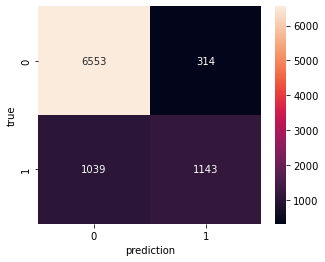

In [219]:
# import plot_confusion_matrix
#plot confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm , annot=True,fmt="d")
plt.xlabel("prediction")
plt.ylabel("true")  

<hr>

In [220]:
# Importing required packages(tree from sklearn) for visualization
from sklearn import tree

In [221]:
# Putting all feature names in a list
features = ['fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week',
            'workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race',
            'sex', 'native.country', 'income']


#Putting all classes in list i.e >=50 and <=50
cls= [">=50" , "<=50"]

In [222]:
#Printing features names
print(features)


print("-----------------------------")
#Printing classes names

print(cls)

['fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week', 'workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country', 'income']
-----------------------------
['>=50', '<=50']


[Text(0.5446428571428571, 0.9, 'race <= 0.5\ngini = 0.377\nsamples = 21113\nvalue = [15787, 5326]\nclass = 0'),
 Text(0.2857142857142857, 0.7, 'capital.gain <= 12.5\ngini = 0.497\nsamples = 8825\nvalue = [4768, 4057]\nclass = 0'),
 Text(0.14285714285714285, 0.5, 'capital.loss <= 5095.5\ngini = 0.449\nsamples = 6177\nvalue = [4074, 2103]\nclass = 0'),
 Text(0.07142857142857142, 0.3, 'capital.gain <= 8.5\ngini = 0.425\nsamples = 5860\nvalue = [4068, 1792]\nclass = 0'),
 Text(0.03571428571428571, 0.1, '\n  (...)  \n'),
 Text(0.10714285714285714, 0.1, '\n  (...)  \n'),
 Text(0.21428571428571427, 0.3, 'fnlwgt <= 62.5\ngini = 0.037\nsamples = 317\nvalue = [6, 311]\nclass = 1'),
 Text(0.17857142857142858, 0.1, '\n  (...)  \n'),
 Text(0.25, 0.1, '\n  (...)  \n'),
 Text(0.42857142857142855, 0.5, 'capital.loss <= 5095.5\ngini = 0.387\nsamples = 2648\nvalue = [694, 1954]\nclass = 1'),
 Text(0.35714285714285715, 0.3, 'hours.per.week <= 1782.5\ngini = 0.43\nsamples = 2216\nvalue = [693, 1523]\nclas

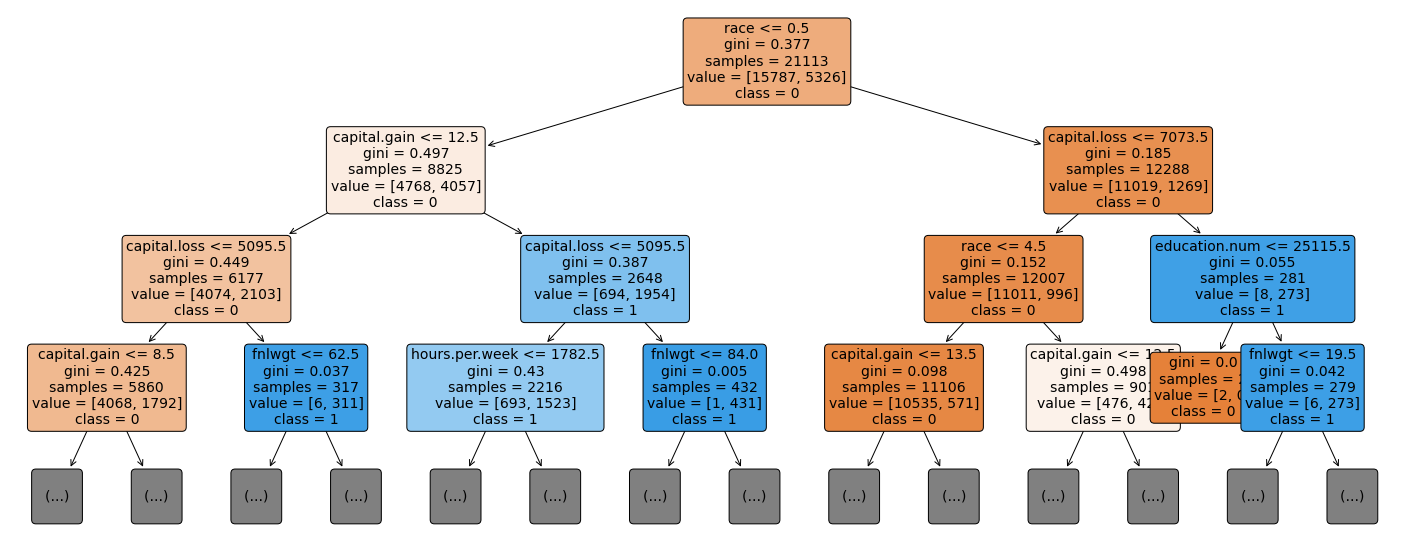

In [226]:
#Plotting our decision tree for max_depth=3

plt.figure(figsize=(25,10))

tree.plot_tree(dt_default,max_depth=3, filled=True, feature_names =features,fontsize=14,rounded=True,class_names=["0","1"])

In [227]:
# Print textual representation of a tree 
text_representation = tree.export_text(dt_default)

# print text_representation
print(text_representation) 

|--- feature_10 <= 0.50
|   |--- feature_2 <= 12.50
|   |   |--- feature_3 <= 5095.50
|   |   |   |--- feature_2 <= 8.50
|   |   |   |   |--- feature_0 <= 37.50
|   |   |   |   |   |--- class: No
|   |   |   |   |--- feature_0 >  37.50
|   |   |   |   |   |--- class: No
|   |   |   |--- feature_2 >  8.50
|   |   |   |   |--- feature_4 <= 1846.00
|   |   |   |   |   |--- class: No
|   |   |   |   |--- feature_4 >  1846.00
|   |   |   |   |   |--- class: Yes
|   |   |--- feature_3 >  5095.50
|   |   |   |--- feature_0 <= 62.50
|   |   |   |   |--- class: Yes
|   |   |   |--- feature_0 >  62.50
|   |   |   |   |--- feature_9 <= 6.50
|   |   |   |   |   |--- class: Yes
|   |   |   |   |--- feature_9 >  6.50
|   |   |   |   |   |--- class: No
|   |--- feature_2 >  12.50
|   |   |--- feature_3 <= 5095.50
|   |   |   |--- feature_4 <= 1782.50
|   |   |   |   |--- feature_5 <= 31.00
|   |   |   |   |   |--- class: No
|   |   |   |   |--- feature_5 >  31.00
|   |   |   |   |   |--- class: Yes
|

## **`Hyperparameter Tuning`**

<p style='text-align: right;'> 20 points </p>


In [228]:
# Import Kfold and GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
# specify number of folds for k-fold CV (we are taking 5)
n_folds = 5

# parameters to build the model on ( As of now just max_depth from range 1 to 40)
parameters = {
    "max_depth": range(1,40)
             }


# instantiate the model (DecisionTreeClassifier) with criteria gini and random_state as 100
dtree = DecisionTreeClassifier(random_state=100)


# instantiate GridSearchCV with above 3 parameters and scoring will be accuracy, while return_train_score as true
dtree = GridSearchCV(estimator=dtree, param_grid=parameters, cv=5, return_train_score=True,scoring="accuracy")



#fit the tree on training data

dtree.fit(X_train, y_train) 

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'max_depth': range(1, 40)}, return_train_score=True,
             scoring='accuracy')

In [229]:
# scores of GridSearch CV
scores = dtree.best_score_
scores

0.8480558238685918

In [230]:
#Check the scores in a dataframe  (here just printing first 5 rows)
tree_df=pd.DataFrame(dtree.cv_results_)
tree_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.031107,0.004434,0.010173,0.002986,1,{'max_depth': 1},0.747810,0.747810,0.747573,0.747750,...,0.747738,0.000087,39,0.747721,0.747721,0.747780,0.747735,0.747735,0.747738,0.000022
1,0.035713,0.000404,0.008767,0.000391,2,{'max_depth': 2},0.812219,0.818612,0.820507,0.825675,...,0.819969,0.004538,16,0.821906,0.820308,0.819834,0.818542,0.819253,0.819969,0.001134
2,0.043481,0.001198,0.008779,0.000401,3,{'max_depth': 3},0.828558,0.834241,0.834478,0.836570,...,0.834273,0.003115,12,0.835998,0.834577,0.834458,0.833758,0.833758,0.834510,0.000819
3,0.050469,0.000492,0.008773,0.000752,4,{'max_depth': 4},0.832583,0.840871,0.842529,0.842729,...,0.840193,0.003860,9,0.841622,0.839491,0.844997,0.838908,0.845421,0.842088,0.002707
4,0.063629,0.006224,0.010173,0.001163,5,{'max_depth': 5},0.834241,0.844897,0.847265,0.842729,...,0.843319,0.004858,7,0.844287,0.844227,0.849319,0.841572,0.849683,0.845818,0.003165


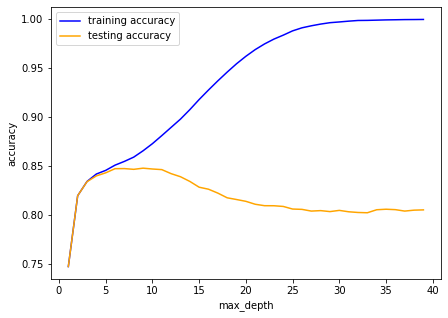

In [231]:
# plotting accuracies with max_depth vs mean train and test scores
plt.figure(figsize=(7,5))
plt.plot(tree_df.param_max_depth,tree_df.mean_train_score,color="blue",label="training accuracy")
plt.plot(tree_df.param_max_depth,tree_df.mean_test_score,color="orange",label="testing accuracy")
plt.xlabel("max_depth")
plt.ylabel("accuracy")
plt.legend()
plt.show()

You can see that as we increase the value of max_depth, both training and test score increase till about max-depth = 10, after which the test score gradually reduces. Note that the scores are average accuracies across the 5-folds. 

Thus, it is clear that the model is overfitting the training data if the max_depth is too high. Next, let's see how the model behaves with other hyperparameters.

<hr>

### Tuning min_samples_leaf

In [232]:
# GridSearchCV to find optimal max_depth


# specify number of folds for k-fold CV (here 5)
n_folds = 5

# parameters to build the model on( just min_samples_leaf with range 5 to 200 and with step of 20)
parameter= {
    "min_samples_leaf":range(5,200,20)
    }


# instantiate the model (DecisionTreeClassifier)
dtree = DecisionTreeClassifier(random_state=100)



# instantiate GridSearchCV with above 3 parameters and scoring will be accuracy, while return_train_score as true
dtree = GridSearchCV(estimator=dtree, param_grid=parameter, cv=5, return_train_score=True,scoring="accuracy")




#fitting the above tree on training data

dtree.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             return_train_score=True, scoring='accuracy')

In [233]:
# scores of GridSearch CV
score = dtree.best_score_
print(score)

# convert scores into dataframe
t_df=pd.DataFrame(dtree.cv_results_)
t_df.head()

0.8482928130482135


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.116676,0.009991,0.009177,0.000399,5,{'min_samples_leaf': 5},0.825716,0.827848,0.819560,0.826149,...,0.823616,0.003696,10,0.915335,0.911782,0.915335,0.912083,0.913149,0.913537,0.001537
1,0.100127,0.006980,0.009770,0.000748,25,{'min_samples_leaf': 25},0.841819,0.851291,0.839451,0.842018,...,0.844788,0.004651,6,0.868028,0.869686,0.871226,0.867503,0.869872,0.869263,0.001343
2,0.089955,0.001725,0.009174,0.000400,45,{'min_samples_leaf': 45},0.843003,0.849159,0.846555,0.851018,...,0.848293,0.003194,1,0.861042,0.860154,0.862581,0.860399,0.863714,0.861578,0.001362
3,0.087164,0.003922,0.010371,0.002793,65,{'min_samples_leaf': 65},0.841108,0.852711,0.845371,0.851492,...,0.845830,0.005589,2,0.857549,0.855773,0.858555,0.855189,0.858149,0.857043,0.001328
4,0.082382,0.002241,0.009372,0.000491,85,{'min_samples_leaf': 85},0.838030,0.849159,0.845371,0.851492,...,0.845214,0.004834,3,0.853108,0.853108,0.855654,0.854005,0.854597,0.854095,0.000963


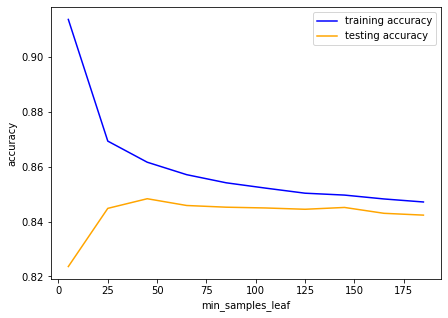

In [234]:
# plotting accuracies with min_samples_leaf vs mean train and test accuracy
plt.figure(figsize=(7,5))
plt.plot(t_df.param_min_samples_leaf,t_df.mean_train_score,color="blue",label="training accuracy")
plt.plot(t_df.param_min_samples_leaf,t_df.mean_test_score,color="orange",label="testing accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("accuracy")
plt.legend()
plt.show()

You can see that at low values of min_samples_leaf, the tree gets a bit overfitted. At values > 100, however, the model becomes more stable and the training and test accuracy start to converge.

<hr>

### Tuning min_samples_split

In [235]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on (here just min_samples_split with range 5 to 200 with step size as 20)
parameter = {
    "min_samples_split":range(5,200,20)
}


# instantiate the model(DecisionTreeClassifier)
dtree = DecisionTreeClassifier(random_state=100)


# instantiate GridSearchCV with above 3 parameters and scoring will be accuracy, while return_train_score as true
dtree = GridSearchCV(estimator=dtree, param_grid=parameter, cv=5, return_train_score=True,scoring="accuracy")


#fitting the above tree on training data

dtree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_split': range(5, 200, 20)},
             return_train_score=True, scoring='accuracy')

In [236]:
# scores of GridSearch CV
score = dtree.best_score_
print(score)


# convert scores into df

ts_df=pd.DataFrame(dtree.cv_results_)
ts_df.head()


0.848529308663964


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.129653,0.019101,0.008976,0.000003,5,{'min_samples_split': 5},0.811982,0.811035,0.818376,0.811701,...,0.812296,0.003296,10,0.969094,0.969331,0.969509,0.970458,0.971227,0.969924,0.000800
1,0.116720,0.003816,0.009974,0.000631,25,{'min_samples_split': 25},0.825006,0.825243,0.830215,0.822596,...,0.826126,0.002581,9,0.906927,0.906513,0.906986,0.906577,0.911847,0.907770,0.002047
2,0.113496,0.002476,0.009581,0.001193,45,{'min_samples_split': 45},0.835188,0.839687,0.830215,0.827333,...,0.834225,0.004783,8,0.890527,0.890053,0.889816,0.888521,0.896335,0.891051,0.002725
3,0.110103,0.002328,0.009174,0.000400,65,{'min_samples_split': 65},0.839451,0.845844,0.837556,0.833728,...,0.840098,0.004360,7,0.883896,0.882238,0.883245,0.880765,0.884258,0.882880,0.001261
4,0.117886,0.014863,0.010770,0.001830,85,{'min_samples_split': 85},0.846081,0.853895,0.838977,0.837281,...,0.844314,0.005898,6,0.877383,0.877442,0.879515,0.875081,0.880706,0.878025,0.001940


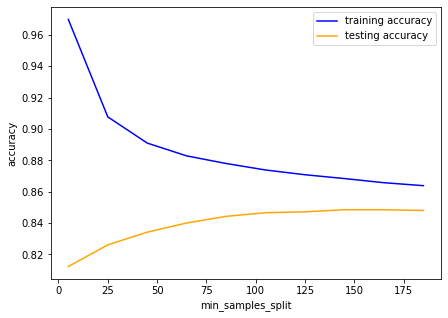

In [237]:
# plotting accuracies with min_samples_leaf  vs mean train and test accuracy
plt.figure(figsize=(7,5))
plt.plot(ts_df.param_min_samples_split,ts_df.mean_train_score,color="blue",label="training accuracy")
plt.plot(ts_df.param_min_samples_split,ts_df.mean_test_score,color="orange",label="testing accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("accuracy")
plt.legend()
plt.show()

This shows that as you increase the min_samples_split, the tree overfits lesser since the model is less complex.

<hr>

## **`Grid Search to Find Optimal Hyperparameters`**

<p style='text-align: right;'> 10 points </p>


In [238]:
# Create the parameter grid ( we already defined for you)
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

# no. of folds(5)
n_folds = 5

# Instantiate the grid search model with default parameters value
dtree = DecisionTreeClassifier(random_state=42)


# instantiate GridSearchCV with above 3 parameters and verbose as 1
grid_search = GridSearchCV(estimator=dtree, param_grid=param_grid, cv=5, verbose=1)



# Fit the grid search to the data

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             verbose=1)

In [239]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)

# print cv results
cv_results


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.075198,0.012981,0.009579,0.001195,entropy,5,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.834241,0.843950,0.840398,0.845097,0.845334,0.841804,0.004173,13
1,0.061431,0.000796,0.008979,0.000006,entropy,5,50,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.834241,0.843950,0.840398,0.845097,0.845334,0.841804,0.004173,13
2,0.061633,0.000744,0.010172,0.001460,entropy,5,100,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.834241,0.842529,0.840398,0.845097,0.845808,0.841615,0.004157,15
3,0.066222,0.003438,0.009573,0.001197,entropy,5,100,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.834241,0.842529,0.840398,0.845097,0.845808,0.841615,0.004157,15
4,0.091953,0.002985,0.008777,0.000400,entropy,10,50,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.842529,0.851527,0.847265,0.854334,0.853861,0.849903,0.004456,3
5,0.091753,0.001669,0.008977,0.000008,entropy,10,50,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.842529,0.851527,0.847265,0.854334,0.853861,0.849903,0.004456,3
6,0.090557,0.004652,0.009782,0.002126,entropy,10,100,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.845134,0.852475,0.847502,0.854098,0.845571,0.848956,0.003661,5
7,0.095336,0.008296,0.009973,0.000892,entropy,10,100,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.845134,0.852475,0.847502,0.854098,0.845571,0.848956,0.003661,5
8,0.065824,0.000892,0.010777,0.000403,gini,5,50,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.834241,0.844897,0.847502,0.845097,0.847466,0.843841,0.004927,9
9,0.074795,0.009425,0.012371,0.002495,gini,5,50,100,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.834241,0.844897,0.847502,0.845097,0.847466,0.843841,0.004927,9


In [240]:
# printing the optimal accuracy score 
print("best accuracy : ",grid_search.best_score_)
#Printing best hyperparameters parameters & its values

print(grid_search.best_params_)

best accuracy :  0.8510400232064759
{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 50}


<hr>

In [286]:
# model with optimal hyperparameters also add random state as 100
clf_gini=DecisionTreeClassifier(random_state=100, max_depth=10, min_samples_leaf=50, min_samples_split=50)
# fitting above model with training data/

clf_gini=clf_gini.fit(X_train, y_train)
clf_gini 

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

In [288]:
# accuracy score
print("score : ",clf_gini.score(X_train,y_train))

score :  0.8564391607066736


[Text(0.6429555084745763, 0.9545454545454546, 'race <= 0.5\ngini = 0.377\nsamples = 21113\nvalue = [15787, 5326]\nclass = 0'),
 Text(0.3676906779661017, 0.8636363636363636, 'capital.gain <= 12.5\ngini = 0.497\nsamples = 8825\nvalue = [4768, 4057]\nclass = 0'),
 Text(0.24332627118644068, 0.7727272727272727, 'capital.loss <= 5095.5\ngini = 0.449\nsamples = 6177\nvalue = [4074, 2103]\nclass = 0'),
 Text(0.17182203389830508, 0.6818181818181818, 'capital.gain <= 8.5\ngini = 0.425\nsamples = 5860\nvalue = [4068, 1792]\nclass = 0'),
 Text(0.04915254237288136, 0.5909090909090909, 'fnlwgt <= 37.5\ngini = 0.193\nsamples = 926\nvalue = [826, 100]\nclass = 0'),
 Text(0.020338983050847456, 0.5, 'workclass <= 49.0\ngini = 0.08\nsamples = 311\nvalue = [298, 13]\nclass = 0'),
 Text(0.013559322033898305, 0.4090909090909091, 'income <= 34.5\ngini = 0.061\nsamples = 254\nvalue = [246, 8]\nclass = 0'),
 Text(0.006779661016949152, 0.3181818181818182, 'gini = 0.0\nsamples = 72\nvalue = [72, 0]\nclass = 0'),

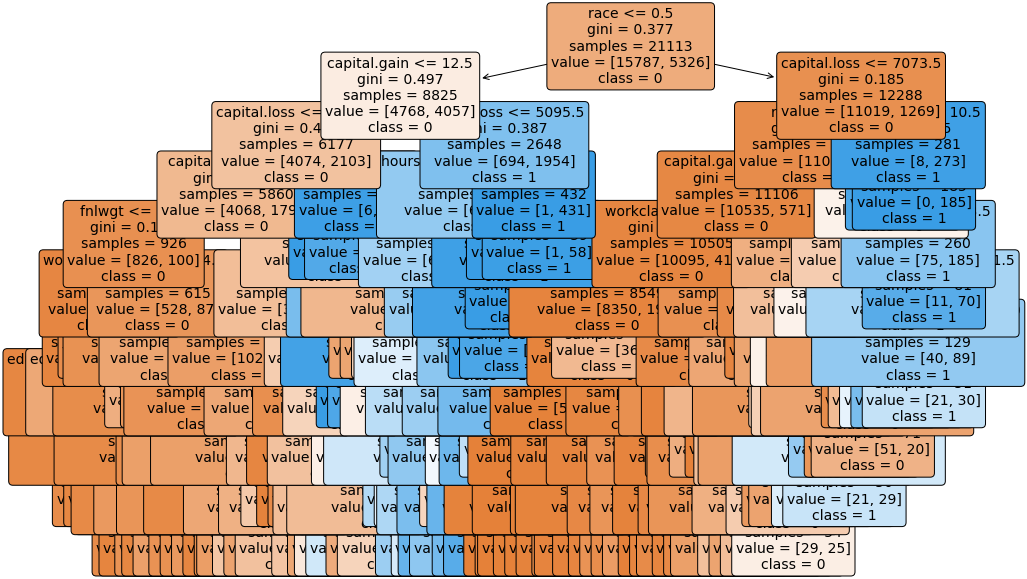

In [289]:
# Importing tree for visualization
from sklearn import tree


# plotting the tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf_gini,feature_names=features,class_names=["0","1"],filled=True,
               rounded=True,fontsize=14)

In [290]:
# tree with max_depth = 3
clf_gini2=DecisionTreeClassifier(random_state=100, max_depth=3, min_samples_leaf=50, min_samples_split=50)

# fitting the model with training data

clf_gini2=clf_gini2.fit(X_train, y_train)
# Print model score

print("score : ",clf_gini2.score(X_train,y_train))

score :  0.8344148155165064


[Text(0.5, 0.875, 'race <= 0.5\ngini = 0.377\nsamples = 21113\nvalue = [15787, 5326]\nclass = 0'),
 Text(0.25, 0.625, 'capital.gain <= 12.5\ngini = 0.497\nsamples = 8825\nvalue = [4768, 4057]\nclass = 0'),
 Text(0.125, 0.375, 'capital.loss <= 5095.5\ngini = 0.449\nsamples = 6177\nvalue = [4074, 2103]\nclass = 0'),
 Text(0.0625, 0.125, 'gini = 0.425\nsamples = 5860\nvalue = [4068, 1792]\nclass = 0'),
 Text(0.1875, 0.125, 'gini = 0.037\nsamples = 317\nvalue = [6, 311]\nclass = 1'),
 Text(0.375, 0.375, 'capital.loss <= 5095.5\ngini = 0.387\nsamples = 2648\nvalue = [694, 1954]\nclass = 1'),
 Text(0.3125, 0.125, 'gini = 0.43\nsamples = 2216\nvalue = [693, 1523]\nclass = 1'),
 Text(0.4375, 0.125, 'gini = 0.005\nsamples = 432\nvalue = [1, 431]\nclass = 1'),
 Text(0.75, 0.625, 'capital.loss <= 7073.5\ngini = 0.185\nsamples = 12288\nvalue = [11019, 1269]\nclass = 0'),
 Text(0.625, 0.375, 'race <= 4.5\ngini = 0.152\nsamples = 12007\nvalue = [11011, 996]\nclass = 0'),
 Text(0.5625, 0.125, 'gini =

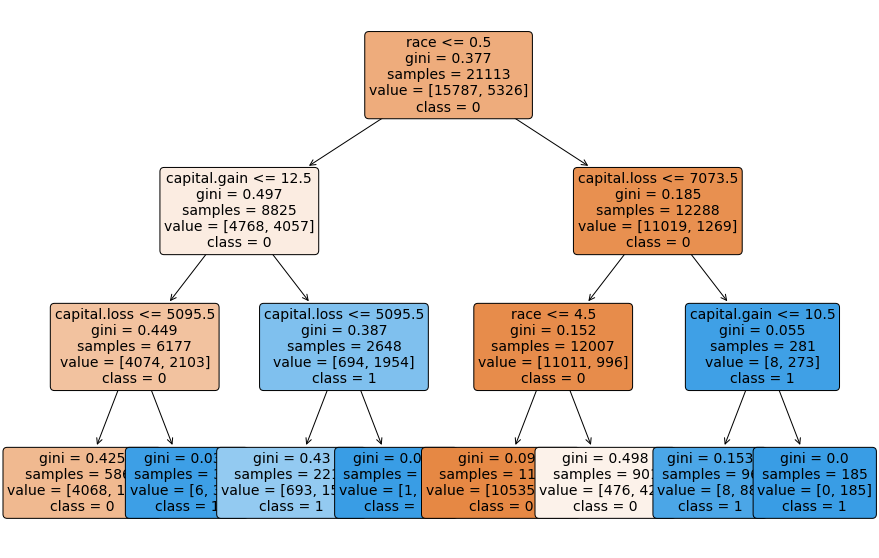

In [291]:
# plotting tree with max_depth=3
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf_gini2,feature_names=features,class_names=["0","1"],filled=True,
               rounded=True,fontsize=14)


In [259]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix
# Making predictions
y_pred_default = clf_gini.predict(X_test)


# Printing classification report
print(classification_report(y_test,y_pred_default))

              precision    recall  f1-score   support

          No       0.85      0.96      0.90      6867
         Yes       0.77      0.47      0.59      2182

    accuracy                           0.84      9049
   macro avg       0.81      0.71      0.74      9049
weighted avg       0.83      0.84      0.82      9049



Text(24.0, 0.5, 'true label')

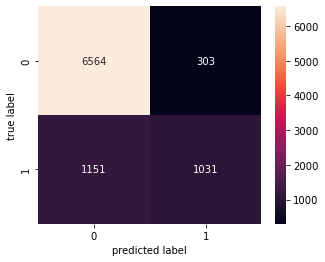

In [260]:
# Print confusion matrix

cm=confusion_matrix(y_test,y_pred_default)
cm


#plot confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm , annot=True,fmt="d")
plt.xlabel("predicted label")
plt.ylabel("true label") 

In [261]:
#Initialise cost_complexity_pruning_path with training data
path =  dt_default.cost_complexity_pruning_path(X_train, y_train)



#Checing out ccp_alphas and impurities
ccp_alphas, impurities = path.ccp_alphas, path.impurities



In [262]:
#Printing all alphas
ccp_alphas


array([0.00000000e+00, 4.29800285e-05, 4.72545439e-05, 7.53369126e-05,
       9.13526962e-05, 1.25651052e-04, 1.80104604e-04, 1.94343709e-04,
       2.68989813e-04, 5.31188215e-04, 7.16342013e-04, 1.07910589e-03,
       1.54564515e-03, 1.99142819e-03, 2.03128006e-03, 2.82048911e-03,
       3.29981250e-03, 3.45878251e-03, 4.07651466e-03, 1.29901716e-02,
       1.39448764e-02, 2.05367356e-02, 2.77360949e-02, 6.18175275e-02])

In [263]:
# Initialise empty arrays for train and test accuracy
Accuracy_Train=[]
Accuracy_Test = []


#Iterate over ccp_alpha
for ccp_alpha in ccp_alphas:
    
    #Instantiate DecisionTreeClassifier with random_state=0 and ccp_alpha as ccp_alpha iterated value
    clf = DecisionTreeClassifier(random_state=0,ccp_alpha=ccp_alpha)
    
    #Fitting model on training data
    clf.fit(X_train, y_train)
    
    #Predicting on train data
    Train_pred=clf.predict(X_train)
    
    
    #predicting on test data
    Test_pred=clf.predict(X_test)
    
    
    #Appending training accuracy 
    Accuracy_Train.append(clf.score(X_train, y_train))
   
    
    #Appending test accuracy 
    Accuracy_Test.append(clf.score(X_test, y_test))


Best CCP: 7.533691257964853e-05


<Figure size 720x288 with 0 Axes>

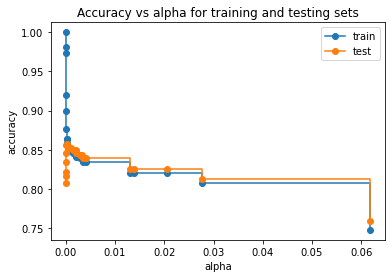

In [264]:
train_scores = [i for i in Accuracy_Train]
test_scores =[j for j in Accuracy_Test]
best_ccp = None
temp = 200000000000000
for i in range(len(ccp_alphas)):
    if train_scores[i]>0.90:
        if abs(train_scores[i]-test_scores[i])<temp:
            temp = abs(train_scores[i]-test_scores[i])
            best_ccp = ccp_alphas[i]

print("Best CCP:", best_ccp)
plt.figure(figsize=(10,4))

# plot the below figure
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [275]:
#Set '0.01'  as ccp_alpha value in our final deciscion tree
from sklearn.metrics import accuracy_score

# Instantiate DecisionTreeClassifier
final_dt=DecisionTreeClassifier(random_state=100, ccp_alpha=0.01,
                               max_depth=3,
                               min_samples_leaf=50,
                               min_samples_split=50)


#Fitting model on training data
final_dt.fit(X_train,y_train)


    
#Predicting on train data
Train_pred=final_dt.predict(X_train)


#predicting on test data
Test_pred=final_dt.predict(X_test)


# Print final test and train accuracy
print("training accuracy:",accuracy_score(y_train, Train_pred))

print("testing accuracy:",accuracy_score(y_test, Test_pred))


training accuracy: 0.8344148155165064
testing accuracy: 0.8393192617968837


[Text(0.5555555555555556, 0.875, 'X[10] <= 0.5\ngini = 0.377\nsamples = 21113\nvalue = [15787, 5326]'),
 Text(0.3333333333333333, 0.625, 'X[2] <= 12.5\ngini = 0.497\nsamples = 8825\nvalue = [4768, 4057]'),
 Text(0.2222222222222222, 0.375, 'X[3] <= 5095.5\ngini = 0.449\nsamples = 6177\nvalue = [4074, 2103]'),
 Text(0.1111111111111111, 0.125, 'gini = 0.425\nsamples = 5860\nvalue = [4068, 1792]'),
 Text(0.3333333333333333, 0.125, 'gini = 0.037\nsamples = 317\nvalue = [6, 311]'),
 Text(0.4444444444444444, 0.375, 'gini = 0.387\nsamples = 2648\nvalue = [694, 1954]'),
 Text(0.7777777777777778, 0.625, 'X[3] <= 7073.5\ngini = 0.185\nsamples = 12288\nvalue = [11019, 1269]'),
 Text(0.6666666666666666, 0.375, 'X[10] <= 4.5\ngini = 0.152\nsamples = 12007\nvalue = [11011, 996]'),
 Text(0.5555555555555556, 0.125, 'gini = 0.098\nsamples = 11106\nvalue = [10535, 571]'),
 Text(0.7777777777777778, 0.125, 'gini = 0.498\nsamples = 901\nvalue = [476, 425]'),
 Text(0.8888888888888888, 0.375, 'gini = 0.055\ns

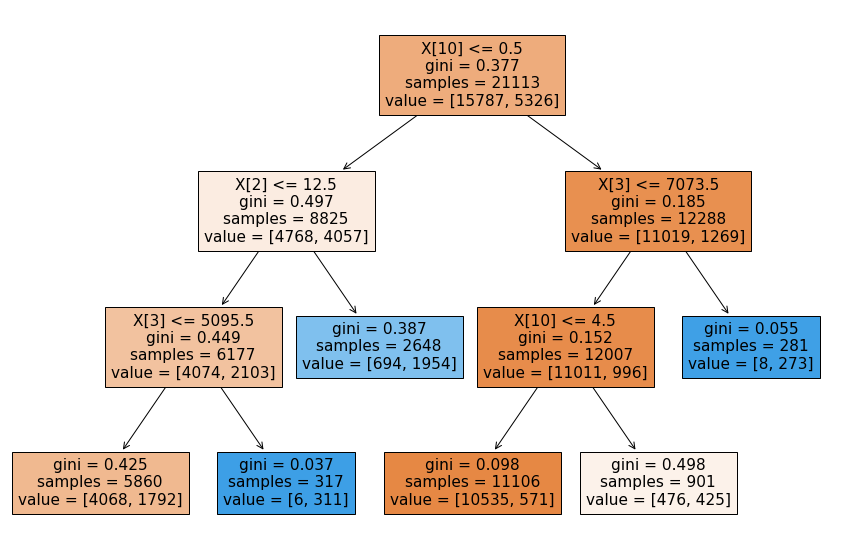

In [272]:
# plotting tree.  
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(final_dt,filled=True)
